### Вариант № 2

# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.  

In [1]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


warnings.filterwarnings("ignore")

2.12.0


In [2]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [3]:
df = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(df)

In [4]:
_1 ='features/density'
_2 = 'features/alcohol'

In [5]:
df = df[list(set(df.select_dtypes(exclude='object').columns.to_list() + [_1] + [_2]))]
columns_to_keep = [col for col in df.columns if df[col].nunique() > 10]
df = df[columns_to_keep]

In [6]:
df.head(5)

,features/density,features/total sulfur dioxide,features/sulphates,features/alcohol,features/free sulfur dioxide,features/citric acid,features/volatile acidity,features/residual sugar,features/fixed acidity,features/pH,features/chlorides
0,1.00080,197.0,0.55,9.0,44.0,0.34,0.32,18.35,7.6,3.22,0.054
1,0.99110,92.0,0.42,12.2,35.0,0.49,0.27,1.20,6.3,3.38,0.063
2,0.99076,51.0,0.48,11.2,6.0,0.11,0.43,1.10,5.3,3.51,0.029
3,0.99672,103.0,0.41,9.0,20.0,0.27,0.41,10.70,6.6,3.08,0.110
4,0.99016,135.0,0.34,12.0,57.0,0.30,0.34,3.80,5.9,3.09,0.035


In [7]:
correlation_matrix = abs(df.corr())
correlation_matrix

,features/density,features/total sulfur dioxide,features/sulphates,features/alcohol,features/free sulfur dioxide,features/citric acid,features/volatile acidity,features/residual sugar,features/fixed acidity,features/pH,features/chlorides
features/density,1.000000,0.529881,0.074493,0.780138,0.294210,0.149503,0.027114,0.838967,0.265331,0.093592,0.257211
features/total sulfur dioxide,0.529881,1.000000,0.134562,0.448892,0.615501,0.121131,0.089261,0.401439,0.091070,0.002321,0.198910
features/sulphates,0.074493,0.134562,1.000000,0.017433,0.059217,0.062331,0.035728,0.026664,0.017143,0.155951,0.016763
features/alcohol,0.780138,0.448892,0.017433,1.000000,0.250104,0.075729,0.067718,0.450631,0.120881,0.121432,0.360189
features/free sulfur dioxide,0.294210,0.615501,0.059217,0.250104,1.000000,0.094077,0.097012,0.299098,0.049396,0.000618,0.101392
features/citric acid,0.149503,0.121131,0.062331,0.075729,0.094077,1.000000,0.149472,0.094212,0.289181,0.163748,0.114364
features/volatile acidity,0.027114,0.089261,0.035728,0.067718,0.097012,0.149472,1.000000,0.064286,0.022697,0.031915,0.070512
features/residual sugar,0.838967,0.401439,0.026664,0.450631,0.299098,0.094212,0.064286,1.000000,0.089021,0.194133,0.088685
features/fixed acidity,0.265331,0.091070,0.017143,0.120881,0.049396,0.289181,0.022697,0.089021,1.000000,0.425858,0.023086
features/pH,0.093592,0.002321,0.155951,0.121432,0.000618,0.163748,0.031915,0.194133,0.425858,1.000000,0.090439


In [8]:
np.fill_diagonal(correlation_matrix.values, np.nan)

lowest_corr_pair = correlation_matrix.unstack().sort_values().dropna().head(1).index.tolist()
highest_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).dropna().head(1).index.tolist()

print("Пара признаков с наиболее низкой корреляцией: ", lowest_corr_pair)
print("Пара признаков с наиболее высокой корреляцией: ", highest_corr_pair)

Пара признаков с наиболее низкой корреляцией:  [('features/free sulfur dioxide', 'features/pH')]
Пара признаков с наиболее высокой корреляцией:  [('features/density', 'features/residual sugar')]


# 2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.  

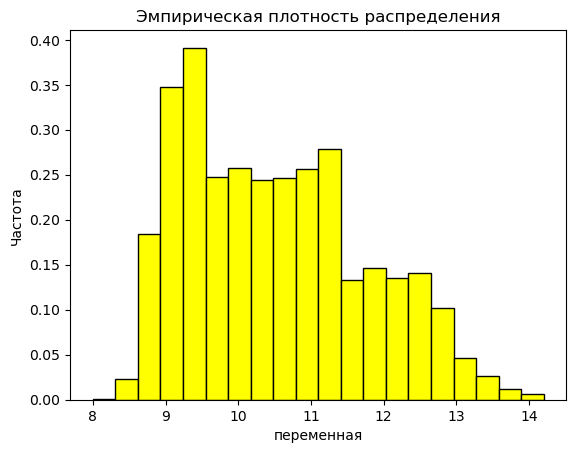

In [9]:
df[_2].plot.hist(color='yellow', edgecolor='black', bins=20, density=True)

plt.xlabel('переменная')
plt.ylabel('Частота')
plt.title('Эмпирическая плотность распределения')

plt.show()

Text(0.5, 1.0, 'Столбчатая диаграмма переменной (высота)')

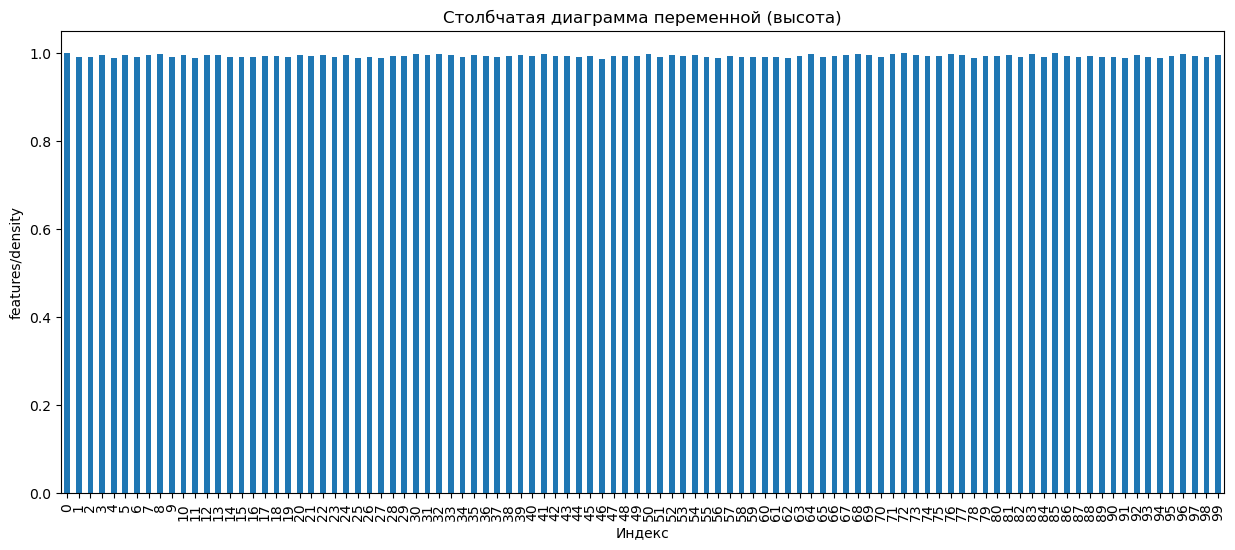

In [10]:
df[_1].head(100).plot.bar(title='Столбчатая диаграмма признака', figsize=(15,6));
plt.xlabel('Индекс')
plt.ylabel(_1)
plt.title('Столбчатая диаграмма переменной (высота)')

# 3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.  

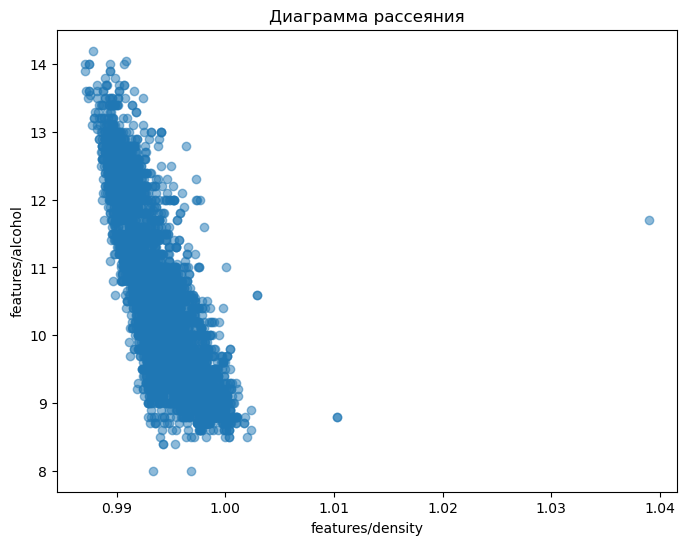

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df[_1], df[_2], alpha=0.5)
plt.xlabel(_1)
plt.ylabel(_2)
plt.title('Диаграмма рассеяния')

plt.show()

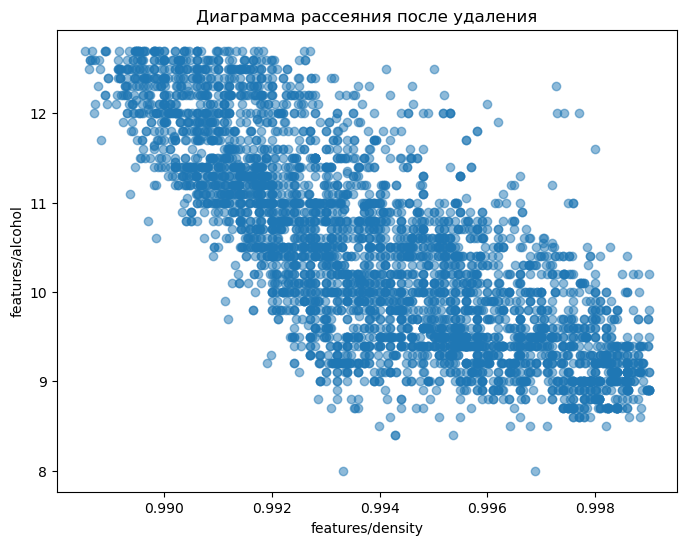

In [12]:
quantile_95_1 = df[_1].quantile(0.95)
quantile_95_2 = df[_2].quantile(0.95)

df = df[(df[_1] <= quantile_95_1) & (df[_2] <= quantile_95_2)]

plt.figure(figsize=(8, 6))
plt.scatter(df[_1], df[_2], alpha=0.5)
plt.xlabel(_1)
plt.ylabel(_2)
plt.title('Диаграмма рассеяния после удаления')
plt.show()

# 4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества $R^2$ (коэффициенту детерминации).  

In [13]:
x, y = df[_1], df[_2]
reg = SimpleLinReg()
reg.fit(x, y)
r2_score(y, reg.predict(x))

0.6033729394088049

In [14]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

model.fit(x, y, epochs=100,verbose=False) 
r2_score(y, model.predict(x))

139/139 [==============================] - 0s 706us/step


0.023416075426410443

#### Лучший подход

SimpleLinReg

# 5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.   

139/139 [==============================] - 0s 717us/step


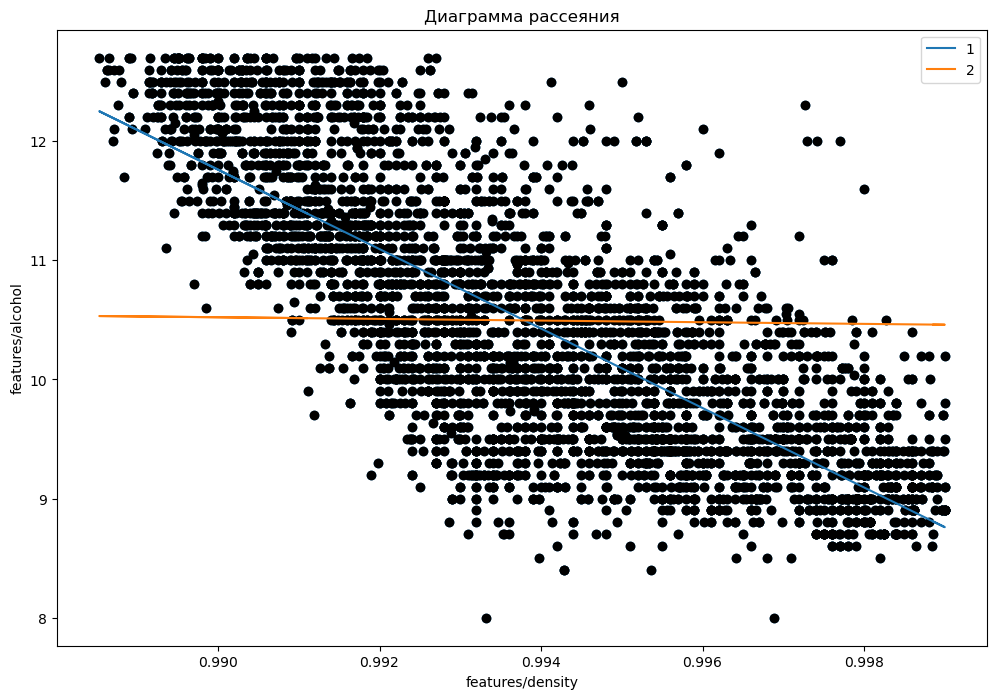

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x, y, c='black')
plt.plot(x, reg.predict(x),label='1')
plt.plot(x, model.predict(x),label='2')
plt.xlabel(_1)
plt.ylabel(_2)
plt.title("Диаграмма рассеяния")
plt.legend();

# 6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак.  

In [16]:
X = df.drop([_2],axis=1)
Y = df[_2]

mean_y = df[_2].mean()
std_y = df[_2].std()

Y = (df[_2] - mean_y) / std_y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train)

# 7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:
#     * линейной регрессии
#     * гребневой регрессии (L2)
#     * лассо регрессии (L1)
# Выберите коэффициенты регуляризации `l1` и `l2` так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки # уменьшалось в процессе обучения).  

In [18]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history = linear_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [19]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, 
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history1 = l1_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [20]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, 
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history2 = l2_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# 8. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [23]:
mse_linear = mean_squared_error(y_test, linear_model.predict(x_test))
mse_l1 = mean_squared_error(y_test, l1_model.predict(x_test))
mse_l2 = mean_squared_error(y_test, l2_model.predict(x_test))

print("\nMSE:")
print("Linear Model:", mse_linear)
print("L1 Model:", mse_l1)
print("L2 Model:", mse_l2)

28/28 [==============================] - 0s 755us/step

MSE:
Linear Model: 0.24082132
L1 Model: 0.15414475
L2 Model: 0.27105945


# 9. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).  

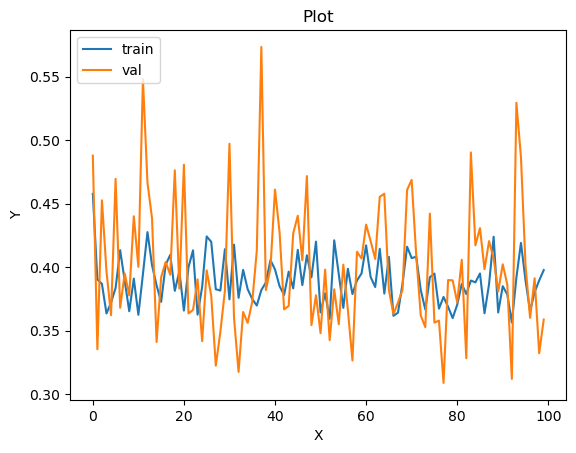

In [27]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 10. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами.  Подпишите оси и создайте легенду и заголовок для рисунка.

In [25]:
x_test[x_test.drop([_1],axis=1).columns] = x_test.drop([_1],axis=1).median()
x_test

,features/density,features/total sulfur dioxide,features/sulphates,features/free sulfur dioxide,features/citric acid,features/volatile acidity,features/residual sugar,features/fixed acidity,features/pH,features/chlorides
1389,0.99280,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
3829,0.99250,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
3752,0.99820,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
1654,0.98949,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
1694,0.99540,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
...,...,...,...,...,...,...,...,...,...,...
3492,0.98994,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
3627,0.99212,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
483,0.99380,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042
1585,0.99200,134.0,0.47,33.0,0.32,0.26,4.8,6.8,3.18,0.042


28/28 [==============================] - 0s 738us/step


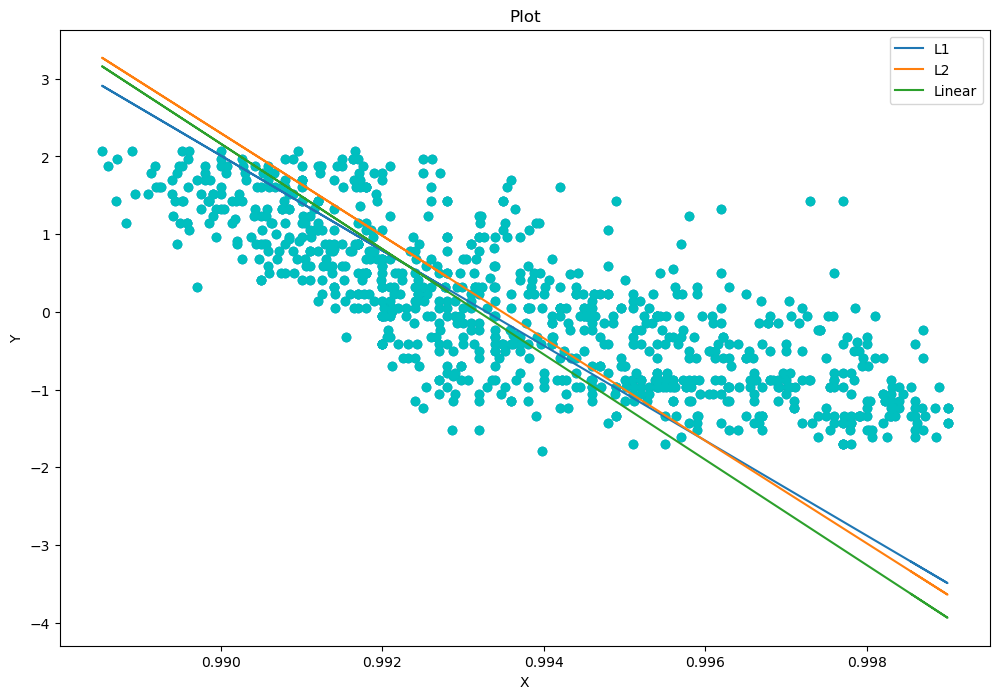

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(x_test[_1], y_test)
plt.scatter(x_test[_1], y_test, c='c')
plt.plot(x_test[_1], l1_model.predict(x_test),label='L1')
plt.plot(x_test[_1], l2_model.predict(x_test),label='L2')
plt.plot(x_test[_1], linear_model.predict(x_test), label='Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend();